In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = "/home/ronald/Documents/Physics_classes/Classes/Labs/Python_macros/Pendulum/data.xlsx"
data = pd.read_excel(data)
print(data)

   L (m)  Delta L (m)  T (s)  Delta T (s)
0   0.10         0.01   0.65         0.01
1   0.15         0.01   0.79         0.01
2   0.20         0.01   0.90         0.01
3   0.25         0.01   1.01         0.01
4   0.30         0.01   1.10         0.01
5   0.35         0.01   1.20         0.01
6   0.40         0.01   1.27         0.01


Slope (a): 4.002142857142863 ± 0.04385481613185909
Intercept (b): 0.019407142857142064 ± 0.011808270622832106
Residuals: 0    0.002879
1    0.004371
2   -0.009836
3    0.000157
4   -0.010050
5    0.019843
6   -0.007364
dtype: float64
g exp:  ( 9.864319943976497 ± 0.10809157814964963 )m/s²


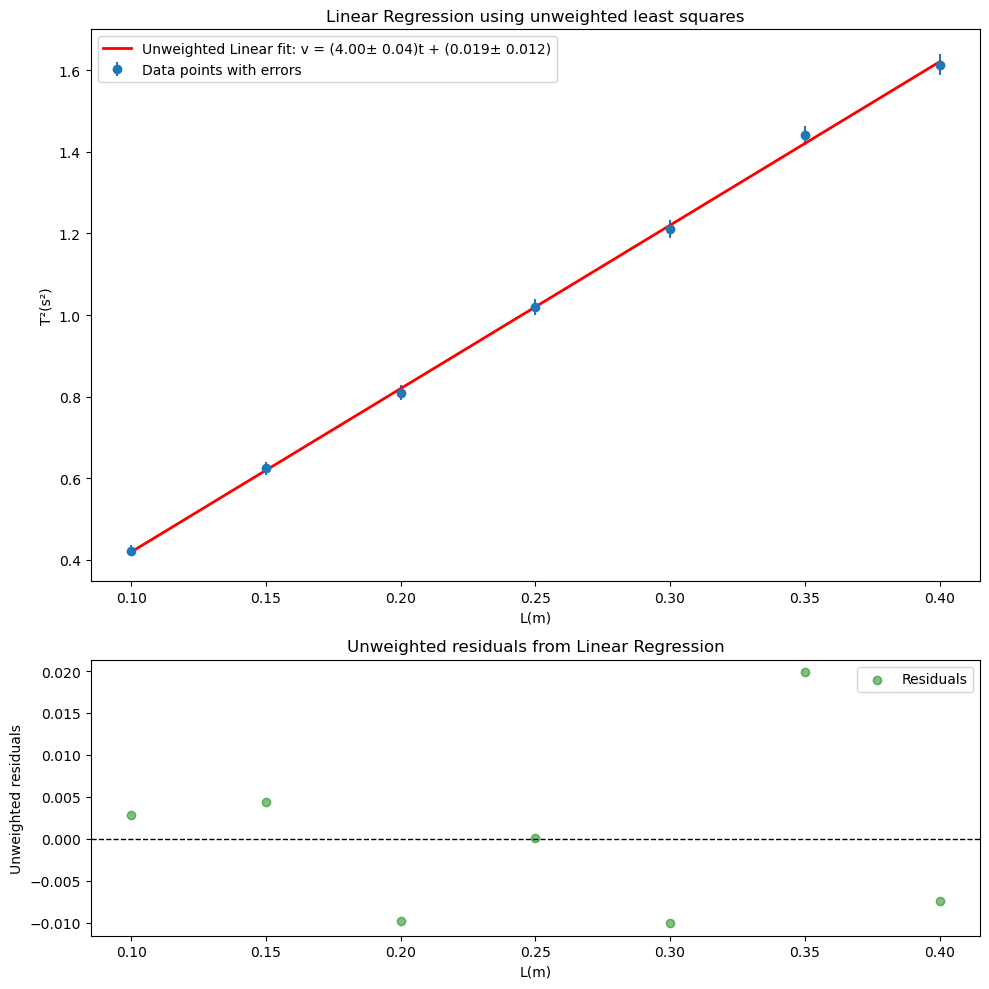

In [2]:
# Calculate the necessary sums
n = len(data)
x = data['L (m)']
y = data['T (s)']**2
xerr = data['Delta L (m)']
yerr = 2 * data['T (s)'] * data['Delta T (s)']
sum_x = x.sum()
sum_y = y.sum()
sum_xx = (x ** 2).sum()
sum_xy = (x * y).sum()

# Calculate slope (a) and intercept (b)
slope = (n * sum_xy - sum_x * sum_y) / (n * sum_xx - sum_x ** 2)
intercept = (sum_y * sum_xx - sum_x * sum_xy) / (n * sum_xx - sum_x ** 2)

# Calculate residuals and variance of residuals
y_pred = slope * x + intercept
residuals = y - y_pred
s2 = (residuals ** 2).sum() / (n - 2)

# Calculate standard errors
slope_std_err = np.sqrt(n * s2 / (n * sum_xx - sum_x ** 2))
intercept_std_err = np.sqrt(s2 * sum_xx / (n * sum_xx - sum_x ** 2))

print(f"Slope (a): {slope} ± {slope_std_err}")
print(f"Intercept (b): {intercept} ± {intercept_std_err}")
print(f"Residuals: {residuals}")
print("g exp: ", "(", (4*np.pi**2)/(slope), "±", (4*np.pi**2)/(slope**2)*slope_std_err, ")m/s²")


# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10), gridspec_kw={'height_ratios': [2, 1]})  # 2 rows, 1 column, width = 10 inches, height = 10 inches

# Plot the regression line
ax1.errorbar(x, y, yerr,  fmt='o', label='Data points with errors')
ax1.plot(x, y_pred, color='red', linewidth=2, label=f'Unweighted Linear fit: v = ({slope:.2f}± {slope_std_err:.2f})t + ({intercept:.3f}± {intercept_std_err:.3f})')

ax1.set_xlabel('L(m)')
ax1.set_ylabel('T²(s²)')
ax1.legend(loc='upper left')
ax1.set_title('Linear Regression using unweighted least squares')

# Plot residuals
ax2.scatter(x, residuals, color='green', alpha=0.5, label='Residuals')
ax2.axhline(0, color='black', linewidth=1, linestyle='--')
ax2.set_xlabel('L(m)')
ax2.set_ylabel('Unweighted residuals')
ax2.legend(loc='upper right')
ax2.set_title('Unweighted residuals from Linear Regression')

plt.tight_layout()

# Save the figure as a PDF file
plt.savefig('Unweighted_linear_regression_with_residuals_least_squares.pdf', format='pdf')
plt.show()

